<a href="https://colab.research.google.com/github/alexathomases/slide-summarizer/blob/main/Slide_Summarization_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data, Models, and Libraries
Be sure to run all the cells in order so that the installations and imports do not interfere with each other.

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Installations and Data Importing

In [ ]:
!pip install matplotlib

#bert encoder libraries installation
!pip install transformers --quiet
!pip install sentencepiece --quiet

#image extraction libraries installation
!pip install PyMuPDF Pillow --quiet
!pip install fitz --quiet

#text extraction libraries installation
!pip install PyPDF4 --quiet

#cloning CLIP
!pip install git+https://github.com/openai/CLIP.git --quiet

#importing data from drive
!unzip /content/drive/Shareddrives/COMP\ 646\ Class\ Project/Data/lecturebank_files.zip

# https://github.com/allenai/scibert
from transformers import * 

# Loading uncased Sci BERT Model
scibert_uncased_tokenizer = AutoTokenizer.from_pretrained('allenai/scibert_scivocab_uncased')
scibert_uncased_model = AutoModel.from_pretrained('allenai/scibert_scivocab_uncased')

     |████████████████████████████████| 4.0 MB 27.2 MB/s 
     |████████████████████████████████| 596 kB 59.0 MB/s 
     |████████████████████████████████| 895 kB 53.5 MB/s 
     |████████████████████████████████| 77 kB 6.1 MB/s 
     |████████████████████████████████| 6.6 MB 47.4 MB/s 
     |████████████████████████████████| 1.2 MB 27.5 MB/s 
     |████████████████████████████████| 8.8 MB 23.4 MB/s 
     |████████████████████████████████| 3.2 MB 29.6 MB/s 
     |████████████████████████████████| 78 kB 5.4 MB/s 
     |████████████████████████████████| 482 kB 51.3 MB/s 
     |████████████████████████████████| 421 kB 54.9 MB/s 
     |████████████████████████████████| 130 kB 58.1 MB/s 
     |████████████████████████████████| 5.1 MB 48.5 MB/s 
     |████████████████████████████████| 41 kB 476 kB/s 
     |████████████████████████████████| 6.4 MB 41.2 MB/s 
     |████████████████████████████████| 63 kB 265 kB/s 
     |████████████████████████████████| 53 kB 1.5 MB/s 
Archive:  /content/drive

Could not locate the tokenizer configuration file, will try to use the model config instead.
https://huggingface.co/allenai/scibert_scivocab_uncased/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpygivqbvs


Downloading:   0%|          | 0.00/385 [00:00<?, ?B/s]

storing https://huggingface.co/allenai/scibert_scivocab_uncased/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/858852fd2471ce39075378592ddc87f5a6551e64c6825d1b92c8dab9318e0fc3.03ff9e9f998b9a9d40647a2148a202e3fb3d568dc0f170dda9dda194bab4d5dd
creating metadata file for /root/.cache/huggingface/transformers/858852fd2471ce39075378592ddc87f5a6551e64c6825d1b92c8dab9318e0fc3.03ff9e9f998b9a9d40647a2148a202e3fb3d568dc0f170dda9dda194bab4d5dd
loading configuration file https://huggingface.co/allenai/scibert_scivocab_uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/858852fd2471ce39075378592ddc87f5a6551e64c6825d1b92c8dab9318e0fc3.03ff9e9f998b9a9d40647a2148a202e3fb3d568dc0f170dda9dda194bab4d5dd
Model config BertConfig {
  "_name_or_path": "allenai/scibert_scivocab_uncased",
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range

Downloading:   0%|          | 0.00/223k [00:00<?, ?B/s]

storing https://huggingface.co/allenai/scibert_scivocab_uncased/resolve/main/vocab.txt in cache at /root/.cache/huggingface/transformers/33593020f507d72099bd84ea6cd2296feb424fecd62d4a8edcc2a02899af6e29.38339d84e6e392addd730fd85fae32652c4cc7c5423633d6fa73e5f7937bbc38
creating metadata file for /root/.cache/huggingface/transformers/33593020f507d72099bd84ea6cd2296feb424fecd62d4a8edcc2a02899af6e29.38339d84e6e392addd730fd85fae32652c4cc7c5423633d6fa73e5f7937bbc38
loading file https://huggingface.co/allenai/scibert_scivocab_uncased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/33593020f507d72099bd84ea6cd2296feb424fecd62d4a8edcc2a02899af6e29.38339d84e6e392addd730fd85fae32652c4cc7c5423633d6fa73e5f7937bbc38
loading file https://huggingface.co/allenai/scibert_scivocab_uncased/resolve/main/tokenizer.json from cache at None
loading file https://huggingface.co/allenai/scibert_scivocab_uncased/resolve/main/added_tokens.json from cache at None
loading file https://huggingf

Downloading:   0%|          | 0.00/422M [00:00<?, ?B/s]

storing https://huggingface.co/allenai/scibert_scivocab_uncased/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/de14937a851e8180a2bc5660c0041d385f8a0c62b1b2ccafa46df31043a2390c.74830bb01a0ffcdeaed8be9916312726d0c4cd364ac6fc15b375f789eaff4cbb
creating metadata file for /root/.cache/huggingface/transformers/de14937a851e8180a2bc5660c0041d385f8a0c62b1b2ccafa46df31043a2390c.74830bb01a0ffcdeaed8be9916312726d0c4cd364ac6fc15b375f789eaff4cbb
loading weights file https://huggingface.co/allenai/scibert_scivocab_uncased/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/de14937a851e8180a2bc5660c0041d385f8a0c62b1b2ccafa46df31043a2390c.74830bb01a0ffcdeaed8be9916312726d0c4cd364ac6fc15b375f789eaff4cbb
Some weights of the model checkpoint at allenai/scibert_scivocab_uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cl

Utility Function to Convert PDF to Multiple Images

In [ ]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

--2022-04-28 05:39:11--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2022-04-28 05:39:11--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 15.5M 4s
    50K .......... .......... .......... .......... ..........  0%

In [ ]:
#pdf2image installations
!conda install -c conda-forge poppler -y --quiet
!pip install pdf2image --quiet
!pip install pytorch-pretrained-bert --quiet

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - poppler


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    fonts-conda-ecosystem-1    |                0           4 KB  conda-forge
    fontconfig-2.14.0          |       h8e229c2_0         305 KB  conda-forge
    gettext-0.19.8.1           |    h73d1719_1008         3.6 MB  conda-forge
    keyutils-1.6.1             |       h166bdaf_0         115 KB  conda-forge
    lerc-3.0                   |       h9c3ff4c_0         216 KB  conda-forge
    libffi-3.4.2               |       h7f98852_5          57 KB  conda-forge
    xorg-renderproto-0.11.1    |    h7f98852_1002           9 KB  conda-forge
    xorg-kbproto-1.0.7         |    h7f98852_1002          27 KB  conda-forge
    poppler-data-0.4.11        |       hd8ed1ab_0         3.6 MB  conda-forge
    libglib-2.7

Importing Libraries and Models
---

Run the following cell to check which python version pdf2image is installed in to modify the following line:        
sys.path.append('/usr/local/lib/python3.??/site-packages')

In [ ]:
!pip install pdf2image

botocore 1.25.2 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.22 which is incompatible.


In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages')  #version varies from one runtime to the other, usually 3.6 but sometimes 3.something else
import pdf2image
from pdf2image import convert_from_path
from pdf2image.exceptions import (PDFInfoNotInstalledError,PDFPageCountError,PDFSyntaxError)
from transformers import BertTokenizer
from collections import defaultdict
import torchvision
import torchvision.transforms as transforms
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import numpy as np
import PyPDF4
import torch
import clip
import math
#import fitz
import io
import re


# Loading CLIP Model
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model, preprocess = clip.load('ViT-B/32', device)

# Loading Bert Model
bert_uncased_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_uncased_model = BertModel.from_pretrained('bert-base-uncased')
bert_uncased_model.eval()

100%|████████████████████████████████████████| 338M/338M [00:03<00:00, 109MiB/s]
https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpzl41lbq0


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

storing https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt in cache at /root/.cache/huggingface/transformers/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
creating metadata file for /root/.cache/huggingface/transformers/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmplq9uz980


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

storing https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json in cache at /root/.cache/huggingface/transformers/c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79
creating metadata file for /root/.cache/huggingface/transformers/c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79
loading file https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/bert-base-uncased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/t

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

storing https://huggingface.co/bert-base-uncased/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
creating metadata file for /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "h

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

storing https://huggingface.co/bert-base-uncased/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/a8041bf617d7f94ea26d15e218abd04afc2004805632abc0ed2066aa16d50d04.faf6ea826ae9c5867d12b22257f9877e6b8367890837bd60f7c54a29633f7f2f
creating metadata file for /root/.cache/huggingface/transformers/a8041bf617d7f94ea26d15e218abd04afc2004805632abc0ed2066aa16d50d04.faf6ea826ae9c5867d12b22257f9877e6b8367890837bd60f7c54a29633f7f2f
loading weights file https://huggingface.co/bert-base-uncased/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/a8041bf617d7f94ea26d15e218abd04afc2004805632abc0ed2066aa16d50d04.faf6ea826ae9c5867d12b22257f9877e6b8367890837bd60f7c54a29633f7f2f
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.pre

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

#Helper Functions

In [ ]:
def extract_text(pathName):
  """
  Input: pdf path name
  Output: corpus_per_page - 2D Dictionary mapping each slide to all the word
          counts for each word in the corresponding slide       
          text_per_page - list of strings where each string corresponds to all
                          the text in a given slide
  """

  pdfFileObj = open(str(pathName), 'rb')
  pdfReader = PyPDF4.PdfFileReader(pdfFileObj)

  #number of slides in slidedeck
  num_of_pages = pdfReader.numPages 

  #initializing word count dictionaries
  pdf_corpus = defaultdict(int) #keeping track of word counts accross entire pdf
  corpus_per_page = defaultdict(lambda: defaultdict(int)) #keeping track of word counts per page
  text_per_page = [] #list where each element is a string containing all the text in a given page

  for page_no in  range(0,num_of_pages):
    
    #extracting text from specific page
    pageObj = pdfReader.getPage(page_no)
    page_text = pageObj.extractText()

    filtered_text = re.split('[^a-zA-Z]', page_text) #removing anything but english words
    polished_text = [i for i in filtered_text if (i and len(i) > 3)] #removing empty strings and strings shorter than a specific length
    
    #gathering all the text in the slide into one string
    current_page = ""
    for word in polished_text:
      current_page = current_page + word + " "

    text_per_page.append(current_page)
    
    #counting the words per slide
    for word in polished_text:
      if word != " " or word != '':
        pdf_corpus[word] = pdf_corpus[word] + 1
        corpus_per_page[page_no][word] = corpus_per_page[page_no][word] + 1

  pdfFileObj.close() 

  return corpus_per_page, text_per_page

#########################################################################################################################################

def createImageList(pathName):
  """
  Input: pdf path name
  Output: list of slides in slidedeck as images
  """
  images = convert_from_path(pathName)

  image_list = []
  for i, image in enumerate(images):
    fname = "slide" + str(i) + ".png"
    image.save(fname, "PNG")
    image_list.append(fname)
  
  return image_list

#########################################################################################################################################

def clip_features(slides_in_deck):
  """
  Inputs:
  slides_in_deck - list of slides in slidedeck as images

  Outputs:
  diagram_probs - list where i^th entry is the probability that i^th slide contains a diagram
  equation_probs - list where i^th entry is the probability that i^th slide contains an equation
  image_distance_matrix - matrix where entry (i, j) is distance between slides i and j as images

  Identifiying objects in the slides with clip and returning CLIP image  encodings
  """

  importances = defaultdict(lambda:1)

  # Prepare text inputs
  classes = ["diagram", "chart", "figure", "equation"]
  text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in classes]).to(device)
  with torch.no_grad():
        text_features = clip_model.encode_text(text_inputs)
  text_features /= text_features.norm(dim=-1, keepdim=True)

  all_image_features = []
  diagram_probs = []
  equation_probs = []
  index = 0
  for slide in list(slides_in_deck):
    image_input = preprocess(Image.open(slide)).unsqueeze(0).to(device)

    # Calculate features
    with torch.no_grad():
        image_features = clip_model.encode_image(image_input)

    # Pick the most similar label for the image
    image_features /= image_features.norm(dim=-1, keepdim=True)
    all_image_features.append(image_features)
    similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
    diagram_probs.append(similarity[0][0].item())
    equation_probs.append(similarity[0][3].item())

  #matrix whose i,j entry measures the distance between the encodings of slide i
  #and slide j
  image_distance_matrix = defaultdict(lambda: defaultdict(int))

  for slide1 in range(0,len(slides_in_deck)):
    for slide2 in range(0,len(slides_in_deck)):
      image_distance_matrix[slide1][slide2] = np.linalg.norm(all_image_features[slide1] - all_image_features[slide2])

  return (diagram_probs, equation_probs, image_distance_matrix)

#########################################################################################################################################

def text_encoding_distances(model, tokenizer, text_per_page):
  """
  Inputs: 
          model - specifying which model to use for text encoding
          text_per_page - list of strings where each strings corresponds to all
                          the text in a given slide
          importances - dicitonary mapping each slide index to its corresponding
                        importance score
  """
  #tokenize texts and retrieve text encodings
  if tokenizer == clip.tokenize:
    tokenized_text = tokenizer(text_per_page)
    text_encodings = model(tokenized_text)
    text_encodings_processed = text_encodings.detach().numpy()
  else:
    tokenized_text = tokenizer(text_per_page, padding=True, return_tensors="pt") 
    text_encodings_unprocessed = model(**tokenized_text)
    text_encodings_processed = text_encodings_unprocessed.last_hidden_state.detach()

  #matrix whose i,j entry measures the distance between the encodings of slide i
  #and slide j
  text_distance_matrix = defaultdict(lambda: defaultdict(int))

  for slide1_text in range(0,len(text_per_page)):
    for slide2_text in range(0,len(text_per_page)):
      text_distance_matrix[slide1_text][slide2_text] = np.linalg.norm(text_encodings_processed[slide1_text] - text_encodings_processed[slide2_text]) 

  dissimilarity_scores = []
  similarity_scores = []
  for slide in range(0,len(text_per_page)):
    dissimilarity_scores.append(sum(list(text_distance_matrix[slide].values())))
    similarity_scores.append(1/sum(list(text_distance_matrix[slide].values())))
    
  return text_distance_matrix, dissimilarity_scores, similarity_scores

#########################################################################################################################################

def show_image_group(slides_as_images, image_ids, k, summary = bool, encoder = None,slidedeck=None):
  """
  Given all the slides as images along with the indices of the desired slides,
  this function displays the desired images as a list
  """
  if summary:
    Transf = transforms.Compose([transforms.Resize((425, 475)), transforms.ToTensor()])
    imgs = [Transf(Image.open(slides_as_images[id])) for id in image_ids]
    grid = torchvision.utils.make_grid(imgs, nrow = 10)
    plt.figure(figsize=(38,28)); plt.axis(False)
    plt.imshow(F.to_pil_image(grid));
    plt.title("Slide Deck Summary with {0} Slides. Slide Indices: {1}. Total Slides in Deck: {2}" .format(k,image_ids,len(slides_as_images)), fontsize = 20)
    plt.savefig("/content/drive/Shareddrives/COMP 646 Class Project/Images/slide_deck_summary for slidedeck " + str(slidedeck)+ ".png", format = "png", dpi = 300)
  else:
    Transf = transforms.Compose([transforms.Resize((425, 475)), transforms.ToTensor()])
    imgs = [Transf(Image.open(slides_as_images[id])) for id in image_ids]
    grid = torchvision.utils.make_grid(imgs, nrow = 10)
    plt.figure(figsize=(38,28)); plt.axis(False)
    plt.imshow(F.to_pil_image(grid));
    plt.title("Top {0} Most Similar Based on {1}. Chosen Slides Indices: {2}" .format(k,str(encoder), sorted(image_ids)), fontsize = 20)
    plt.savefig("/content/drive/Shareddrives/COMP 646 Class Project/Images/top_similar_by_text_based on " + str(encoder) +".pdf", format = "pdf")
  

#########################################################################################################################################

def top_k_similar_by_text(encoder, slide_number, slides_as_images, distance_matrix, k):
  """
  Inputs:
  encoder - String representing name of corresponding the distance_matrix values
            correspond to
  slide number - reference slide used to compare outputs of the different models
  slides_as_images - list of slides as images
  distance_matrix - matrix corresponding to pairwise distance between slide encodings
  k - number of closest slides to the reference slide by encoding euclidean distance

  Given the inputs, this function displays the top k closest slides to the reference
  slide as an image grid
  """

  ref_slide_distance_values = list(distance_matrix[slide_number].values())

  closest_k_slides = sorted(range(len(ref_slide_distance_values)), key = lambda sub: ref_slide_distance_values[sub])[:k+1]

  show_image_group(slides_as_images, sorted(closest_k_slides[1:]), k, summary = 0, encoder = encoder)

#########################################################################################################################################

def compute_importance(text_similarity, image_distances, text_sim_weight, diagram_probs, 
                      equation_probs, image_sim_weight,diagram_weight,equation_weight):
  
  #finding the image similarity scores for each slide
  image_sim = []
  for slide in range(0,len(text_similarity)):
    image_sim.append(sum(list(image_distances[slide].values())))

  #normalize all features
  img_sim_norm = np.array(image_sim)/ sum(image_sim)
  text_sim_norm = np.array(text_similarity)/ sum(text_similarity)
  equation_probs_norm = np.array(equation_probs)/ sum(equation_probs)
  diagram_probs_norm = np.array(diagram_probs)/ sum(diagram_probs)

  data_matrix = np.vstack((img_sim_norm, text_sim_norm, equation_probs_norm, diagram_probs_norm)).T

  slide_indices = []
  for slide in range(0,len(text_similarity)):
    slide_indices.append("Slide # " + str(slide+1))
  
  features_df = pd.DataFrame(data_matrix,index = slide_indices, columns = ["Image Similarty", "Text Similarity",
                                                                "Equation Probability", "Diagram Probability"])

  importance_scores = ((img_sim_norm * image_sim_weight)+ (text_sim_norm * text_similarity) +
                      (diagram_probs_norm * diagram_weight) + (equation_probs_norm * diagram_weight)).tolist()

  
  return importance_scores, features_df

##########################################################################################################################################

def select_slides(importances, text_distance_matrix, image_distance_matrix, remove_percent, n_summary = None, percentage_of_slide_deck = None):
    """
    Inputs:
    importances - a list where importances[i] is the importance score of the i'th slide
    text_distance_matrix - a 2D dictionary where text_distance_matrix[i][j] is the difference in encodings between slides i and j
    image_distance_matrix - a 2D matrix where image_distance_matrix[i][j] is the difference in encodings between slides i and j
    remove_percent - the percent of "most similar" slides that will be removed from consideration each time a slide is added to the final deck
                      must be float between 0 and 1.
    
    Outputs
    slidedeck - indices of slides included in our summary
    n_summary - number of slides summarized in case the input was percentage_of_slide_deck
    """

    if (type(n_summary) == int) & (type(percentage_of_slide_deck) == float):
      raise  ValueError('Cannot input both n_summary & percentage_of_slide_deck')

    if percentage_of_slide_deck:
      n_summary = int(len(importances) * percentage_of_slide_deck)

    n_remove = int(len(importances) * remove_percent)
    #n_summary = 5 # Can be changed to be a percentage of the slide deck size
    slide_deck = []
    to_consider = list(range(len(importances)))

    # Convert importances to numpy array
    importances = np.array(importances)

    for i in range(n_summary):
        if (len(to_consider) < n_remove):
            break
        # Choose the slide with the highest importance score
        chosen_slide_idx = np.argmax(importances[to_consider])
        chosen_slide = to_consider[chosen_slide_idx]

        # remove chosen slide from consideration
        slide_deck.append(chosen_slide)
        to_consider.remove(chosen_slide)

        # remove n_remove most similar slides from consideration
        # First, get top n_remove most similar slides in terms of both text and distance
        # Store text distances from chosen slide deck as a n by 2 array, where column 1 is the slide number and column 2 is distance
        text_distances = np.array([*text_distance_matrix[chosen_slide].items()])
        texts_to_consider = np.argpartition(text_distances[:, 1][to_consider], n_remove)[:n_remove]
        closest_text_idxs = np.array(to_consider)[texts_to_consider]
        closest_texts = (text_distances[:, 0][closest_text_idxs]).astype(int)

        image_distances = np.array([*image_distance_matrix[chosen_slide].items()])
        images_to_consider = np.argpartition(image_distances[:, 1][to_consider], n_remove)[:n_remove]
        closest_image_idxs = np.array(to_consider)[images_to_consider]
        closest_images = (image_distances[:, 0][closest_image_idxs]).astype(int)

        # Then, remove the intersection of these 2 sets
        to_remove = set(closest_texts) & set(closest_images)
        # print(f"Removing slides {to_remove}")
        for slide in to_remove:
            to_consider.remove(slide)

    return slide_deck, n_summary

#Slide Summarization Function

In [ ]:
def feature_extractor(pathName,text_tokenizer, text_model):
  """
  Inputs:
  pathname - path to pdf of slidedeck
  text_model - text model used for text encoding
  text_tokenizer - text model tokenizer

  """

  #extract text from slidedeck
  corpus_per_page, text_per_page = extract_text(str(pathName))

  #extract all slides as images
  slides_as_images = createImageList(str(pathName))

  #use CLIP to compute three features
  diagram_probs, equation_probs, image_distance_matrix = clip_features(slides_as_images)
  
  #text encoding distances, similarity, & dissimilarity scores between slides
  text_distance_matrix, text_dissimilarity, text_similarity = text_encoding_distances(text_model, text_tokenizer, text_per_page)
  
  return text_distance_matrix, image_distance_matrix, text_similarity, diagram_probs, equation_probs, slides_as_images

def slide_summarizer(text_distance_matrix, text_similarity, image_distance_matrix,equation_probs, diagram_probs, slides_as_images, 
                     selection_removal_percentage, text_sim_weight, image_sim_weight,diagram_weight,equation_weight,
                     n_summary, percentage_of_slide_deck, slidedeck):
  """
  Inputs:
  text_sim_weight - text similarity weight
  image_sim_weight - image similarity weight
  diagram_weight - weight for importance of diagrams in slides
  equation_weight - weight for importance of equations in slides
  selection_removal_percentage - percentage of similar slides we remove upon selection of a slide
  n_summary - number of slides to include in the summary

  Output:
  Dataframe representing all the features that we based slide selection on
  
  This function also displays the summary in an image grid
  """

  if (image_sim_weight + text_sim_weight + equation_weight + diagram_weight != 1.00):
    raise ValueError("Sum of weights must add to 1")

  #computing importance score and returning features dataframe for reference
  importance_scores, features_df = compute_importance(text_similarity, image_distance_matrix, text_sim_weight, diagram_probs, 
                                                    equation_probs, image_sim_weight,diagram_weight,equation_weight)

  summarized_slidedeck, n_summary = select_slides(importance_scores, text_distance_matrix, image_distance_matrix, selection_removal_percentage, 
                                                   n_summary=n_summary, percentage_of_slide_deck=percentage_of_slide_deck)
  
  summarized_slidedeck_sorted = sorted(summarized_slidedeck)

  show_image_group(slides_as_images, summarized_slidedeck_sorted, n_summary, summary = 1, slidedeck=slidedeck) 

  return features_df 

#Testing the Slide Summarizer

Run the features extractor only the first time you want to summmarize a slide deck. A seperate function was created and placed in the cell right after that for the actual slide summarization to facilitate quicker testing for the weightings of the features and other parameters of interest


In [ ]:
#path of slidedeck you wanna summarize
slidedeck = "/content/lecturebank_files/191.pdf"

text_distance_matrix, image_distance_matrix, text_similarity, diagram_probs, equation_probs, slides_as_images = feature_extractor(slidedeck, scibert_uncased_tokenizer, scibert_uncased_model)

Test the parameters here

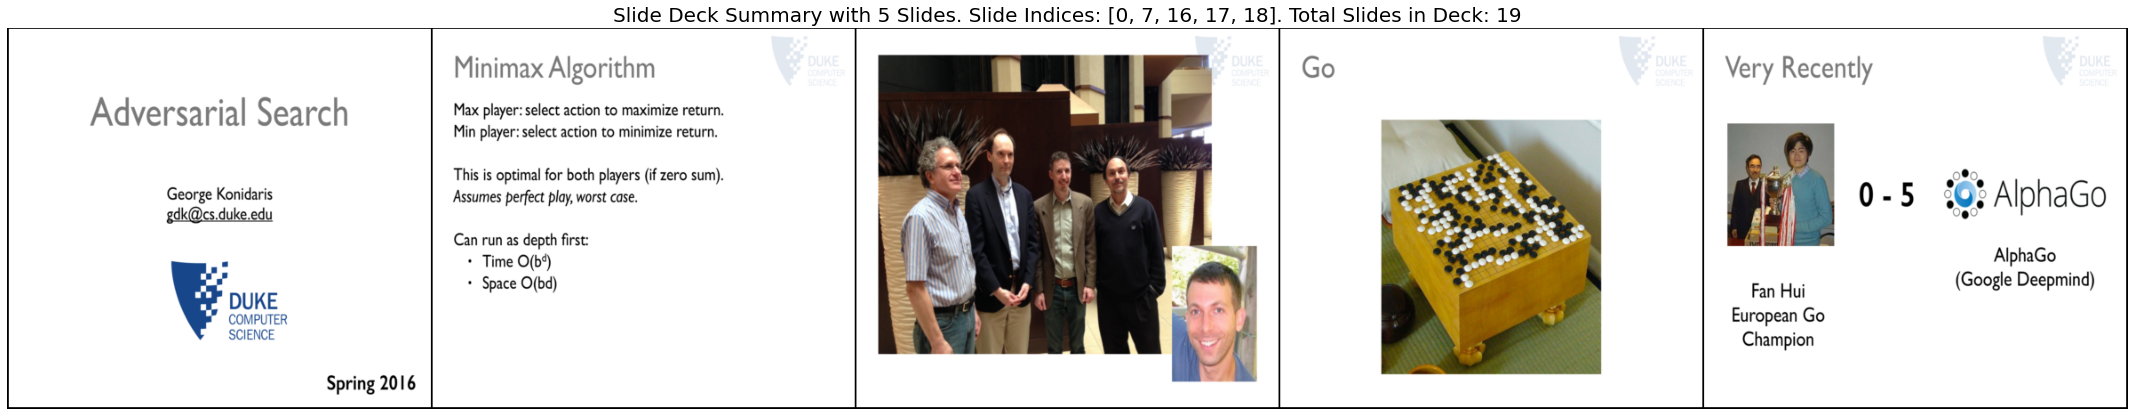

In [ ]:
features_dataframe =  slide_summarizer(text_distance_matrix, text_similarity, image_distance_matrix, equation_probs, diagram_probs, slides_as_images,
                                        selection_removal_percentage = 0.05,   #percentage of similar slides to remove upon selecting a slide of interest
                                        text_sim_weight = 0.3, 
                                        image_sim_weight = 0.1, 
                                        diagram_weight = 0.2,
                                        equation_weight = 0.4,
                                        n_summary = 5,                       #number of slides to include in summary, must be None when using percentage_of_slide_deck
                                        percentage_of_slide_deck = None,     #percentage of slidedeck to select for summary, must be None when using n_summary
                                        slidedeck= 191)
                                        

In [ ]:
display(features_dataframe)

,Image Similarty,Text Similarity,Equation Probability,Diagram Probability
Slide # 1,0.038106,0.028527,0.006384,0.040471
Slide # 2,0.032062,0.030122,0.000248,0.026285
Slide # 3,0.032187,0.031060,0.000783,0.033549
Slide # 4,0.028981,0.027927,0.001300,0.039808
Slide # 5,0.027314,0.032329,0.000467,0.031831
Slide # 6,0.027698,0.028255,0.071558,0.015990
Slide # 7,0.025255,0.027979,0.001372,0.021376
Slide # 8,0.027613,0.029115,0.152800,0.015932
Slide # 9,0.025356,0.027979,0.001243,0.023033
Slide # 10,0.026843,0.027979,0.003269,0.023944


#Evaluating Text Encoders

In [ ]:
pathName = "/content/lecturebank_files/1071.pdf"

#extract text from slidedeck
corpus_per_page, text_per_page = extract_text(str(pathName))

#extract all slides as images
slides_as_images = createImageList(str(pathName))


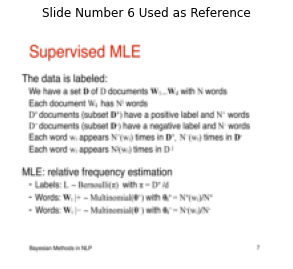

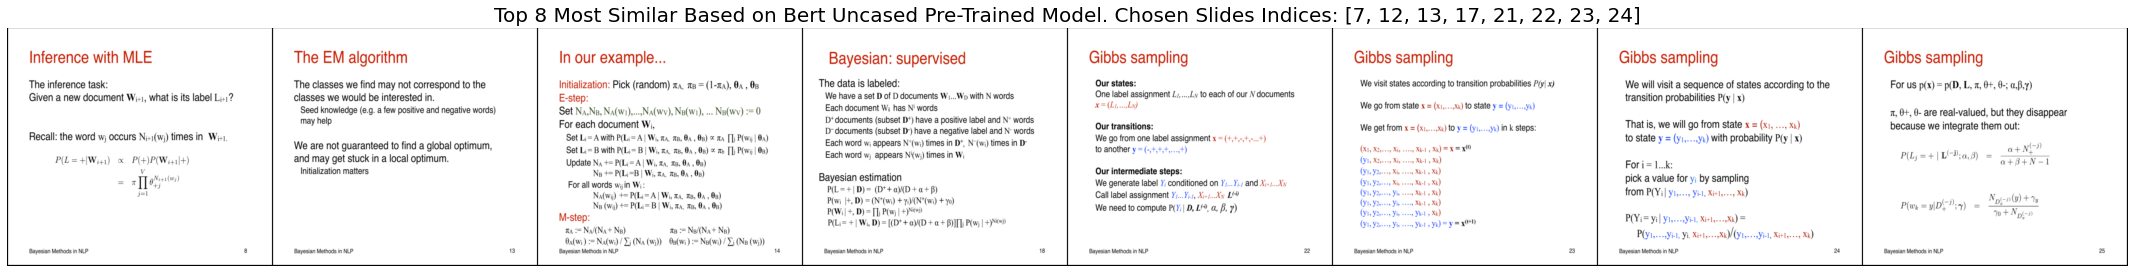

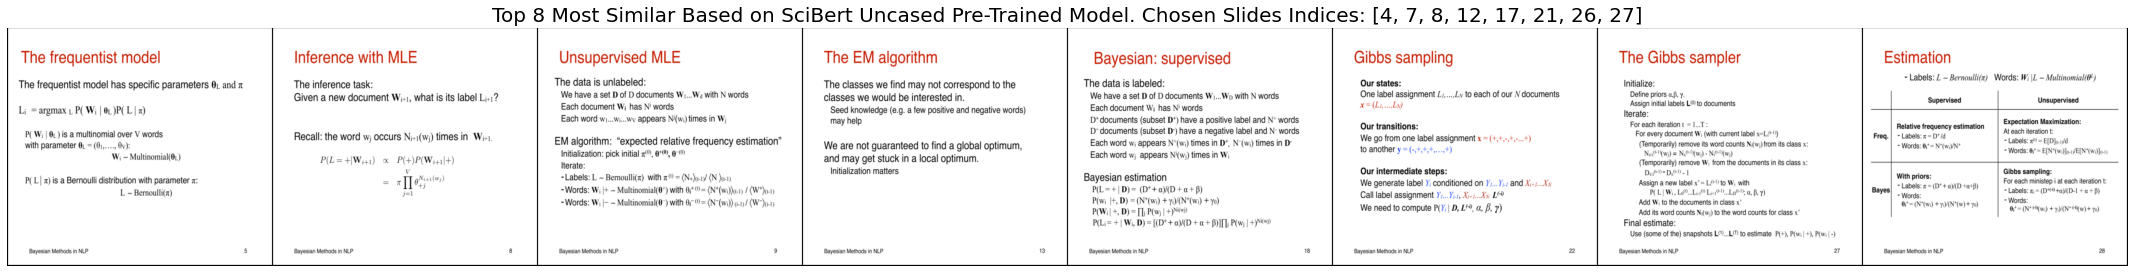

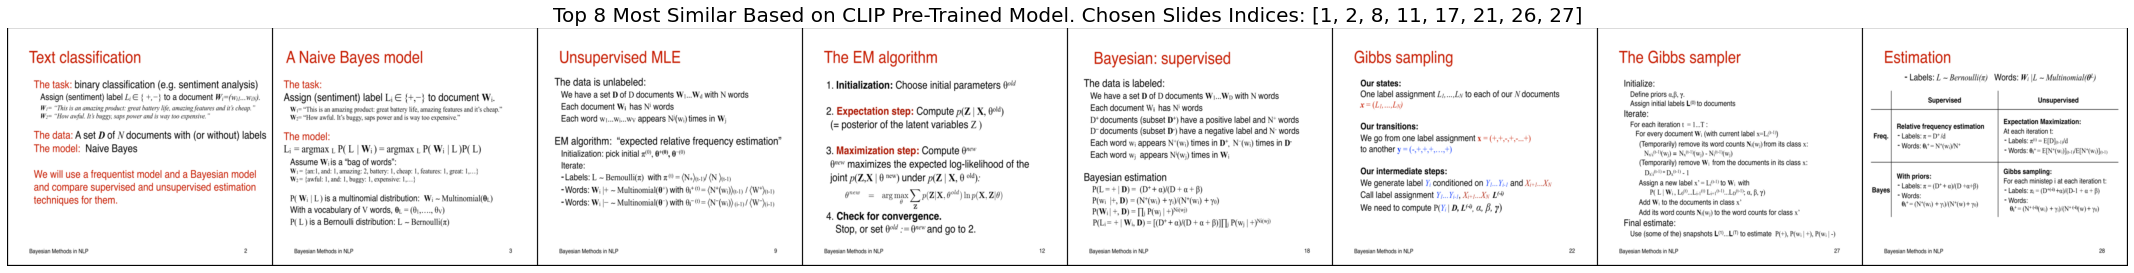

In [ ]:
reference_slide_index = 6

Transf = transforms.Compose([transforms.Resize((180, 210)), transforms.ToTensor()])
imgs = [Transf(Image.open(slides_as_images[reference_slide_index]))]
grid = torchvision.utils.make_grid(imgs, nrow = 10)
plt.figure(figsize=(5,5)); plt.axis(False)
plt.imshow(F.to_pil_image(grid));
plt.title("Slide Number {0} Used as Reference" .format(reference_slide_index))
plt.savefig("/content/drive/Shareddrives/COMP 646 Class Project/Images/reference_slide.pdf", format = "pdf")

matrix, diss, sim = text_encoding_distances(bert_uncased_model, bert_uncased_tokenizer, text_per_page)
top_k_similar_by_text("Bert Uncased Pre-Trained Model", reference_slide_index, slides_as_images, matrix, 8)
matrix, diss, sim = text_encoding_distances(scibert_uncased_model, scibert_uncased_tokenizer, text_per_page)
top_k_similar_by_text("SciBert Uncased Pre-Trained Model", reference_slide_index, slides_as_images, matrix, 8)
matrix, diss, sim = text_encoding_distances(clip_model.encode_text, clip.tokenize, text_per_page)
top_k_similar_by_text("CLIP Pre-Trained Model", reference_slide_index, slides_as_images, matrix, 8)


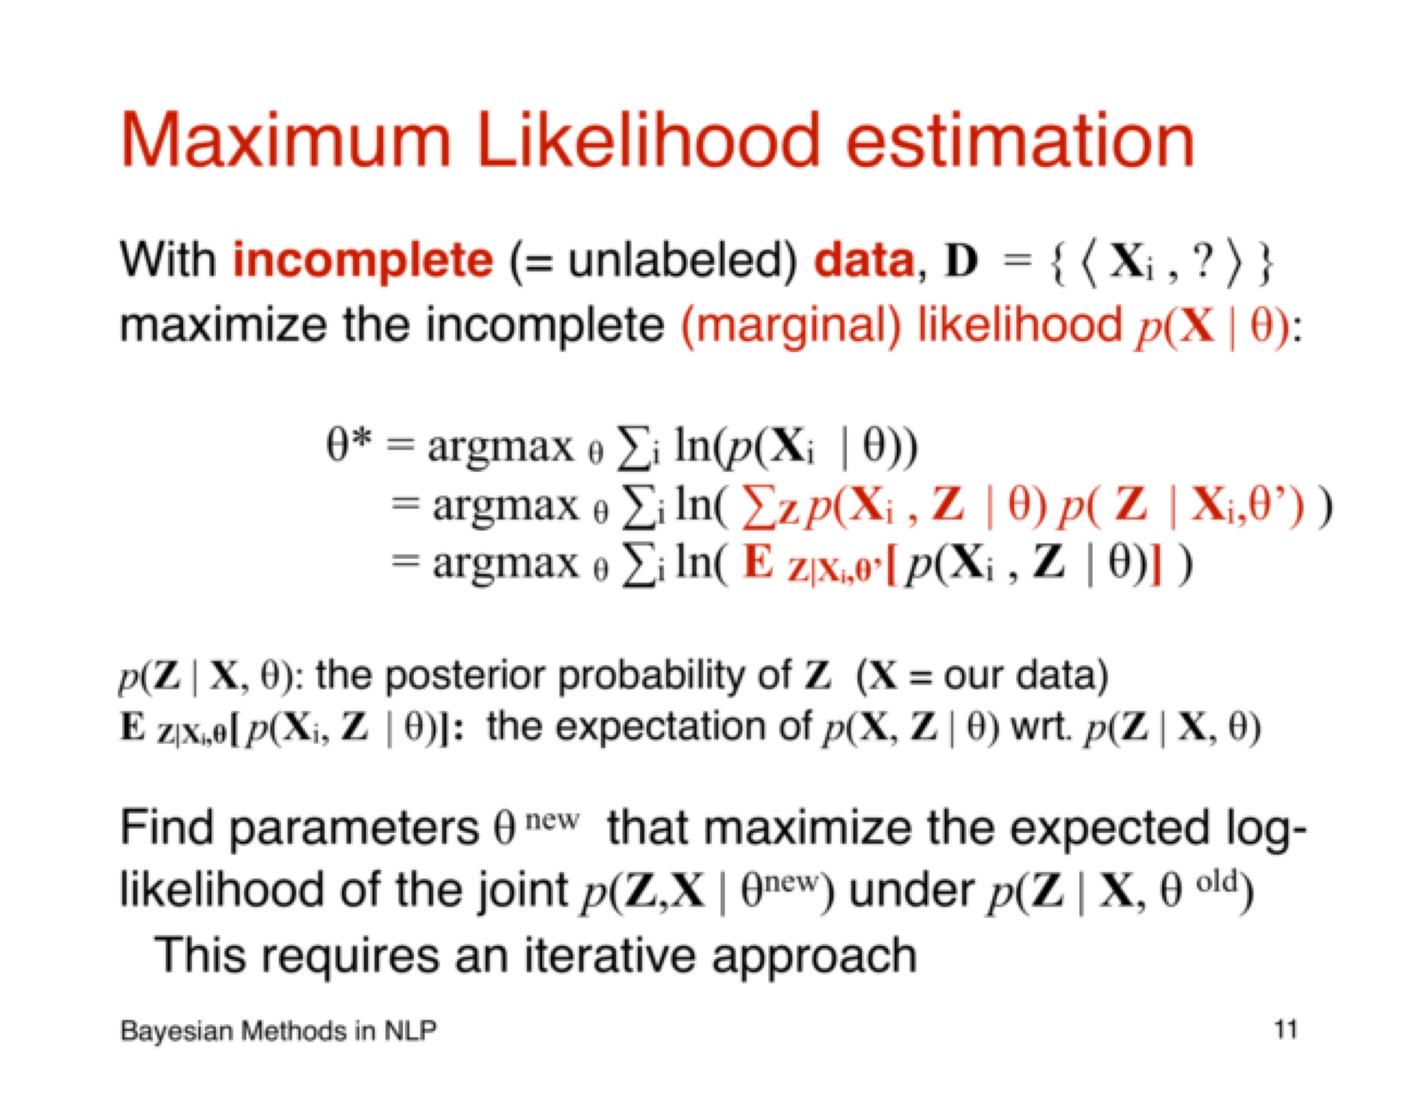

In [ ]:
current_image = Image.open(slides_as_images[10])
Transf = transforms.Compose([transforms.Resize((500,650)), transforms.ToTensor()])
transformed_image = Transf(current_image)
plt.figure(figsize=(30,20)); plt.axis(False)
plt.imshow(F.to_pil_image(transformed_image));
plt.savefig("/content/drive/Shareddrives/COMP 646 Class Project/Images/slide10_deck1071.pdf", format = "pdf")

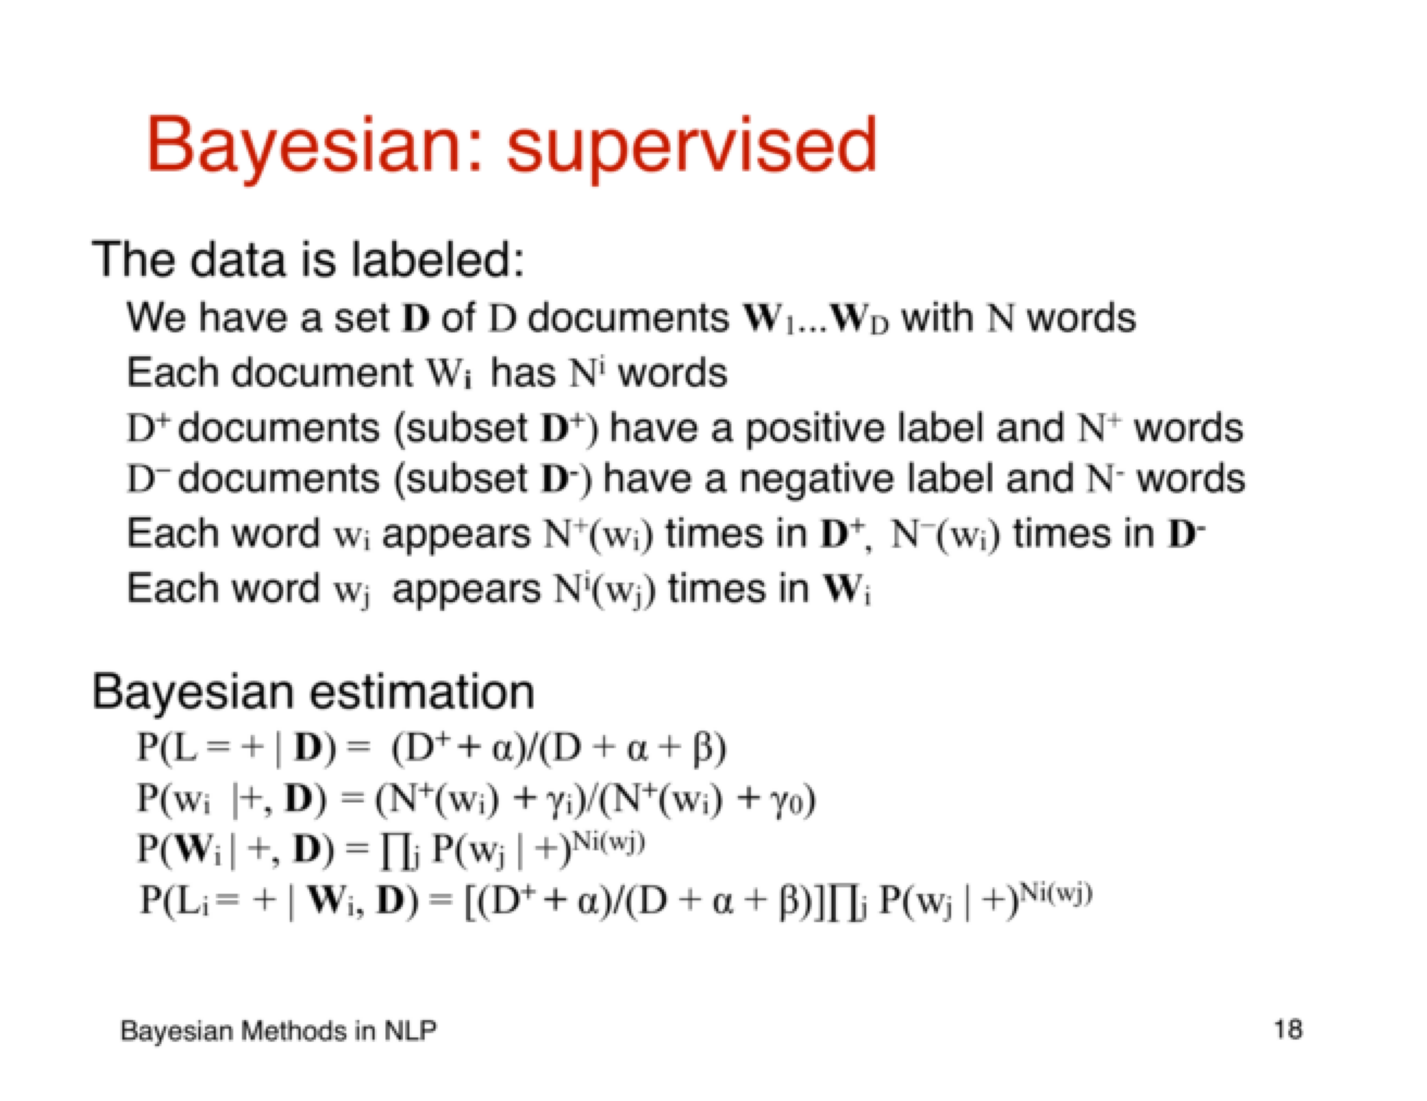

In [ ]:
current_image = Image.open(slides_as_images[17])
Transf = transforms.Compose([transforms.Resize((500, 650)), transforms.ToTensor()])
transformed_image = Transf(current_image)
plt.figure(figsize=(30,20)); plt.axis(False)
plt.imshow(F.to_pil_image(transformed_image));
plt.savefig("/content/drive/Shareddrives/COMP 646 Class Project/Images/slide17_deck1071.pdf", format = "pdf")

#Evaluating Results

In [ ]:
import random
from collections import *
import regex as re
import numpy as np

model_outputs = {182: [7,14,17,24,27], 441 : [3,6,15,18,22], 747 : [3,7,12,14,21]}

#random generator outputs
random_182 = sorted(random.sample(range(34), 5))
random_441 = sorted(random.sample(range(28), 5))
random_747 = sorted(random.sample(range(22), 5))

random_outputs = {182 : random_182, 441 : random_441, 747 : random_747}

feedback = {182 : ["182: 3, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 3, 5, 2, 5, 5, 5, 3, 3, 3, 2, 5, 5", #5 added at the end
                   "182: 5, 5, 1, 1, 3, 1, 3, 1, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 3, 1, 5, 1, 5, 5, 5, 5, 5, 5",
                   "182: 1, 3, 3, 4, 2, 4, 2, 5, 2, 2, 1, 1, 4, 3, 5, 4, 2, 3, 1, 1, 1, 5, 5, 3, 4, 3, 1, 5, 1, 3, 3, 3, 2, 3",
                   "182: 5, 4, 5, 3, 4, 3, 4, 2, 4, 4, 4, 4, 3, 4, 3, 3, 4, 1, 4, 4, 4, 2, 3, 3, 3, 3, 4, 2, 4, 4, 4, 4, 4, 5",
                   "182: 5, 1, 3, 2, 5, 2, 4, 1, 5, 4, 5, 5, 3, 3, 1, 3, 4, 1, 3, 3, 4, 1, 1, 2, 3, 2, 4, 1, 3, 3, 3, 3, 4, 5",
                   "182: 5, 5, 3, 5, 3, 5, 3, 5, 5, 5, 5, 4, 4, 3, 3, 5, 2, 5, 5, 5, 2, 2, 4, 3, 4, 5, 2, 4, 3, 4, 5, 5, 5, 5", #5 added at the end
                   "182: 5, 3, 1, 2, 4, 4, 1, 4, 2, 5, 5, 5, 3, 3, 4, 1, 3, 3, 3, 3, 2, 2, 4, 4, 1, 3, 3, 4, 2, 2, 3, 4, 4, 5", #5 added at the end
                   "182: 5, 3, 3, 1, 5, 2, 4, 1, 4, 3, 3, 3, 3, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 3, 2, 4, 3, 1, 3, 4, 2, 3, 1, 5"],
            441 : ["441: 5, 2, 2, 5, 5, 2, 5, 3, 5, 3, 3, 3, 4, 5, 3, 3, 5, 2, 4, 4, 5, 5, 3, 5, 5, 5, 4, 5",
                   "441: 5, 5, 1, 2, 5, 5, 5, 5, 1, 5, 5, 3, 5, 5, 3, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5",
                   "441: 1, 1, 5, 3, 1, 1, 3, 1, 4, 1, 3, 5, 4, 3, 5, 4, 3, 5, 1, 3, 1, 1, 2, 1, 1, 1, 5, 1",
                   "441: 5, 5, 2, 1, 3, 3, 1, 3, 1, 3, 1, 1, 3, 3, 2, 2, 4, 2, 4, 2, 4, 4, 1, 5, 5, 5, 2, 5",
                   "441: 5, 5, 2, 2, 4, 4, 2, 4, 3, 4, 2, 2, 4, 1, 3, 3, 4, 2, 3, 3, 4, 4, 2, 4, 4, 4, 2, 4",
                   "441: 5, 2, 2, 4, 4, 3, 5, 4, 5, 3, 3, 2, 3, 3, 2, 4, 3, 4, 4, 5, 5, 3, 5, 5, 5, 3, 5, 5",    #5 added at the end
                   "441: 5, 5, 4, 2, 4, 4, 2, 4, 4, 4, 3, 1, 2, 3, 1, 4, 5, 2, 1, 3, 5, 5, 1, 5, 5, 5, 1, 5",
                   "441: 5, 5, 1, 1, 3, 3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 4, 3, 3, 2, 3, 3, 1, 3, 3, 3, 2, 3"],
            747 : ["747: 5, 2, 3, 3, 3, 4, 4, 5, 1, 3, 4, 2, 2, 5, 4, 5, 5, 5, 5, 5, 5, 3",
                   "747: 5, 5, 3, 1, 4, 4, 3, 4, 4, 3, 1, 2, 3, 4, 2, 3, 5, 5, 5, 5, 5, 4",
                   "747: 1, 4, 3, 4, 3, 2, 2, 2, 3, 4, 5, 4, 3, 2, 2, 3, 3, 3, 4, 4, 5, 3",
                   "747: 5, 2, 1, 1, 2, 2, 3, 3, 5, 3, 1, 1, 2, 4, 2, 4, 5, 5, 5, 5, 5, 1",
                   "747: 5, 3, 3, 1, 3, 3, 1, 1, 4, 2, 3, 2, 3, 4, 2, 3, 4, 4, 4, 4, 4, 1",
                   "747: 4, 4, 3, 3, 3, 4, 5, 5, 4, 2, 1, 4, 4, 4, 5, 3, 4, 4, 5, 5, 3, 5",  #5 added at the end
                   "747: 5, 3, 1, 3, 1, 4, 2, 4, 2, 5, 5, 5, 1, 3, 4, 4, 2, 3, 3, 3, 1, 5",  #5 added at the end
                   "747: 5, 2, 4, 1, 3, 3, 2, 1, 2, 2, 1, 1, 2, 3, 1, 3, 3, 3, 3, 3, 2, 3"],                
            }

random_gen_sois = defaultdict(lambda : defaultdict(lambda : defaultdict(int)))       
random_gen_raw_scores = defaultdict(lambda : defaultdict(lambda : defaultdict(int))) 

model_results_avg = defaultdict(lambda : defaultdict(int))
random_gen_results_avg = defaultdict(lambda : defaultdict(int))
model_results = defaultdict(lambda : defaultdict(int))
random_gen_results = defaultdict(lambda : defaultdict(int))

for slidedeck in model_outputs.keys():
  for responses in feedback[slidedeck]:
    exp_results = re.sub("\D","",responses)[3:]
    for slide in range(0,5):
      summarizer_index = model_outputs[slidedeck][slide]
      random_index = random_outputs[slidedeck][slide]
      model_results[slidedeck][summarizer_index] += int(exp_results[summarizer_index])
      random_gen_results[slidedeck][random_index] += int(exp_results[random_index])
      model_results[slidedeck]["overall"] += int(exp_results[summarizer_index])
      random_gen_results[slidedeck]["overall"] += int(exp_results[random_index])

for slidedeck in model_outputs.keys():
    #take average for each slide
    print("Per Slide Scores for Slidedeck {}" .format(slidedeck))
    for slide in range(0,5):
      summarizer_index = model_outputs[slidedeck][slide]
      random_index = random_outputs[slidedeck][slide]
      print("Slide Number {2} Average Score: {0}" .format(model_results[slidedeck][summarizer_index] / len(feedback[slidedeck]), model_results[slidedeck][summarizer_index], summarizer_index))
      model_results_avg[slidedeck]["average for slide " + str(summarizer_index)] = model_results[slidedeck][summarizer_index] / len(feedback[slidedeck])
      random_gen_results_avg[slidedeck]["average for slide " + str(random_index)] = random_gen_results[slidedeck][random_index] / len(feedback[slidedeck])
    print("\n")
    for slide in range(0,5):
      summarizer_index = model_outputs[slidedeck][slide]
      random_index = random_outputs[slidedeck][slide]
      model_results_avg[slidedeck]["overall score"] += model_results_avg[slidedeck]["average for slide " + str(summarizer_index)]
      random_gen_results[slidedeck]["overall score"] += random_gen_results_avg[slidedeck]["average for slide " + str(random_index)]

      random_gen_sois[slidedeck][float("inf")] = random_gen_results[slidedeck]["overall score"] - 5
      random_gen_raw_scores[slidedeck][float("inf")] = random_gen_results[slidedeck]["overall"]

#conducting remainder of 10 experiments to eveluate performance of random generator
for experiment in range(0,9):

  #randome generator outputs
  random_182 = sorted(random.sample(range(34), 5))
  random_441 = sorted(random.sample(range(28), 5))
  random_747 = sorted(random.sample(range(22), 5))

  random_outputs = {182 : random_182, 441 : random_441, 747 : random_747}

  random_gen_results_avg = defaultdict(lambda : defaultdict(int))
  random_gen_results = defaultdict(lambda : defaultdict(int))

  for slidedeck in model_outputs.keys():
      for responses in feedback[slidedeck]:
        exp_results = re.sub("\D","",responses)[3:]
        for slide in range(0,5):
          random_index = random_outputs[slidedeck][slide]
          random_gen_results[slidedeck][random_index] += int(exp_results[random_index])
          random_gen_results[slidedeck]["overall"] += int(exp_results[random_index])

  for slidedeck in model_outputs.keys():
      #take average for each slide
      for slide in range(0,5):
        random_index = random_outputs[slidedeck][slide]
        random_gen_results_avg[slidedeck]["average for slide " + str(random_index)] = random_gen_results[slidedeck][random_index] / len(feedback[slidedeck])
      for slide in range(0,5):
        summarizer_index = model_outputs[slidedeck][slide]
        random_index = random_outputs[slidedeck][slide]
        random_gen_results[slidedeck]["overall score"] += random_gen_results_avg[slidedeck]["average for slide " + str(random_index)]

      random_gen_sois[slidedeck][experiment] = random_gen_results[slidedeck]["overall score"] - 5
      random_gen_raw_scores[slidedeck][experiment] = random_gen_results[slidedeck]["overall"]

for slidedeck in model_outputs.keys():
  print("For slidedeck {0}" .format(slidedeck, model_outputs[slidedeck]))
  print("Summarizer chosen slides: {0}, Random generator chosen slides (on the last of 10 experiments): {1}" .format(model_outputs[slidedeck], random_outputs[slidedeck]))
  print("Raw Scores in Each of 10 Experiments", list(random_gen_raw_scores[slidedeck].values()))
  print("Summarizer Raw Score: {0}, Random Generator Raw Score (Averaged on 10 Trials): {1}" .format(model_results[slidedeck]["overall"], np.mean(np.array(list(random_gen_raw_scores[slidedeck].values())))))
  print("Summarizer Sub-Optimality Index: {0}, Random Generator Sub-Optimality Index (Averaged on 10 Trials): {1} \n" .format(model_results_avg[slidedeck]["overall score"]-5, np.mean(np.array(list(random_gen_sois[slidedeck].values())))))


Per Slide Scores for Slidedeck 182
Slide Number 7 Average Score: 3.0
Slide Number 14 Average Score: 3.5
Slide Number 17 Average Score: 3.0
Slide Number 24 Average Score: 2.75
Slide Number 27 Average Score: 2.875


Per Slide Scores for Slidedeck 441
Slide Number 3 Average Score: 2.5
Slide Number 6 Average Score: 3.0
Slide Number 15 Average Score: 3.25
Slide Number 18 Average Score: 3.125
Slide Number 22 Average Score: 2.5


Per Slide Scores for Slidedeck 747
Slide Number 3 Average Score: 2.125
Slide Number 7 Average Score: 3.125
Slide Number 12 Average Score: 2.5
Slide Number 14 Average Score: 2.75
Slide Number 21 Average Score: 3.125


For slidedeck 182
Summarizer chosen slides: [7, 14, 17, 24, 27], Random generator chosen slides (on the last of 10 experiments): [7, 16, 18, 20, 23]
Raw Scores in Each of 10 Experiments [136, 150, 139, 137, 136, 136, 134, 129, 132, 128]
Summarizer Raw Score: 121, Random Generator Raw Score (Averaged on 10 Trials): 135.7
Summarizer Sub-Optimality Index: 1